<a href="https://colab.research.google.com/github/sakshiigdtuw/HACKHAZARD_RURAL_PROJECT/blob/main/CROP_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HackHazard'25/Crop_recommendation.csv")
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# **Exploratory Data Analysis**

In [9]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

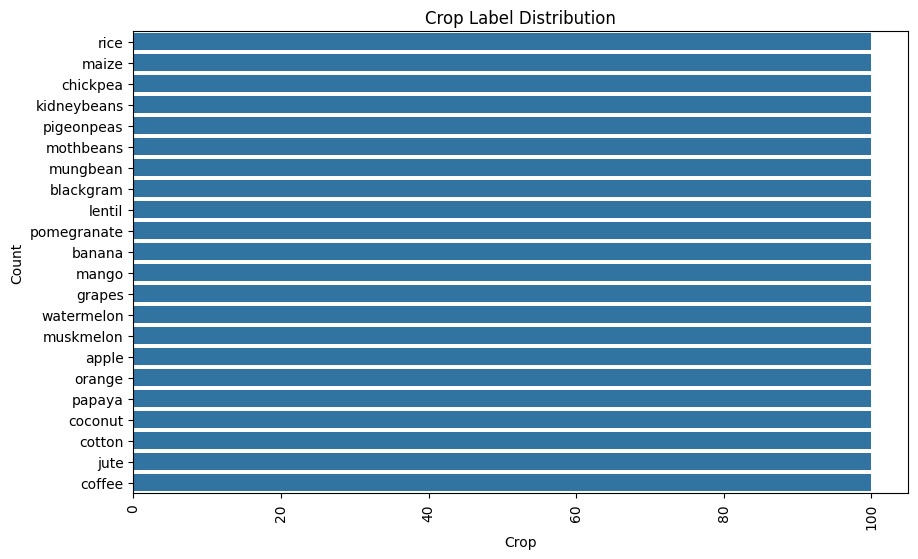

In [18]:
# Visualize the distributions
plt.figure(figsize=(10, 6))
sns.countplot(df['label'])
plt.title('Crop Label Distribution')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

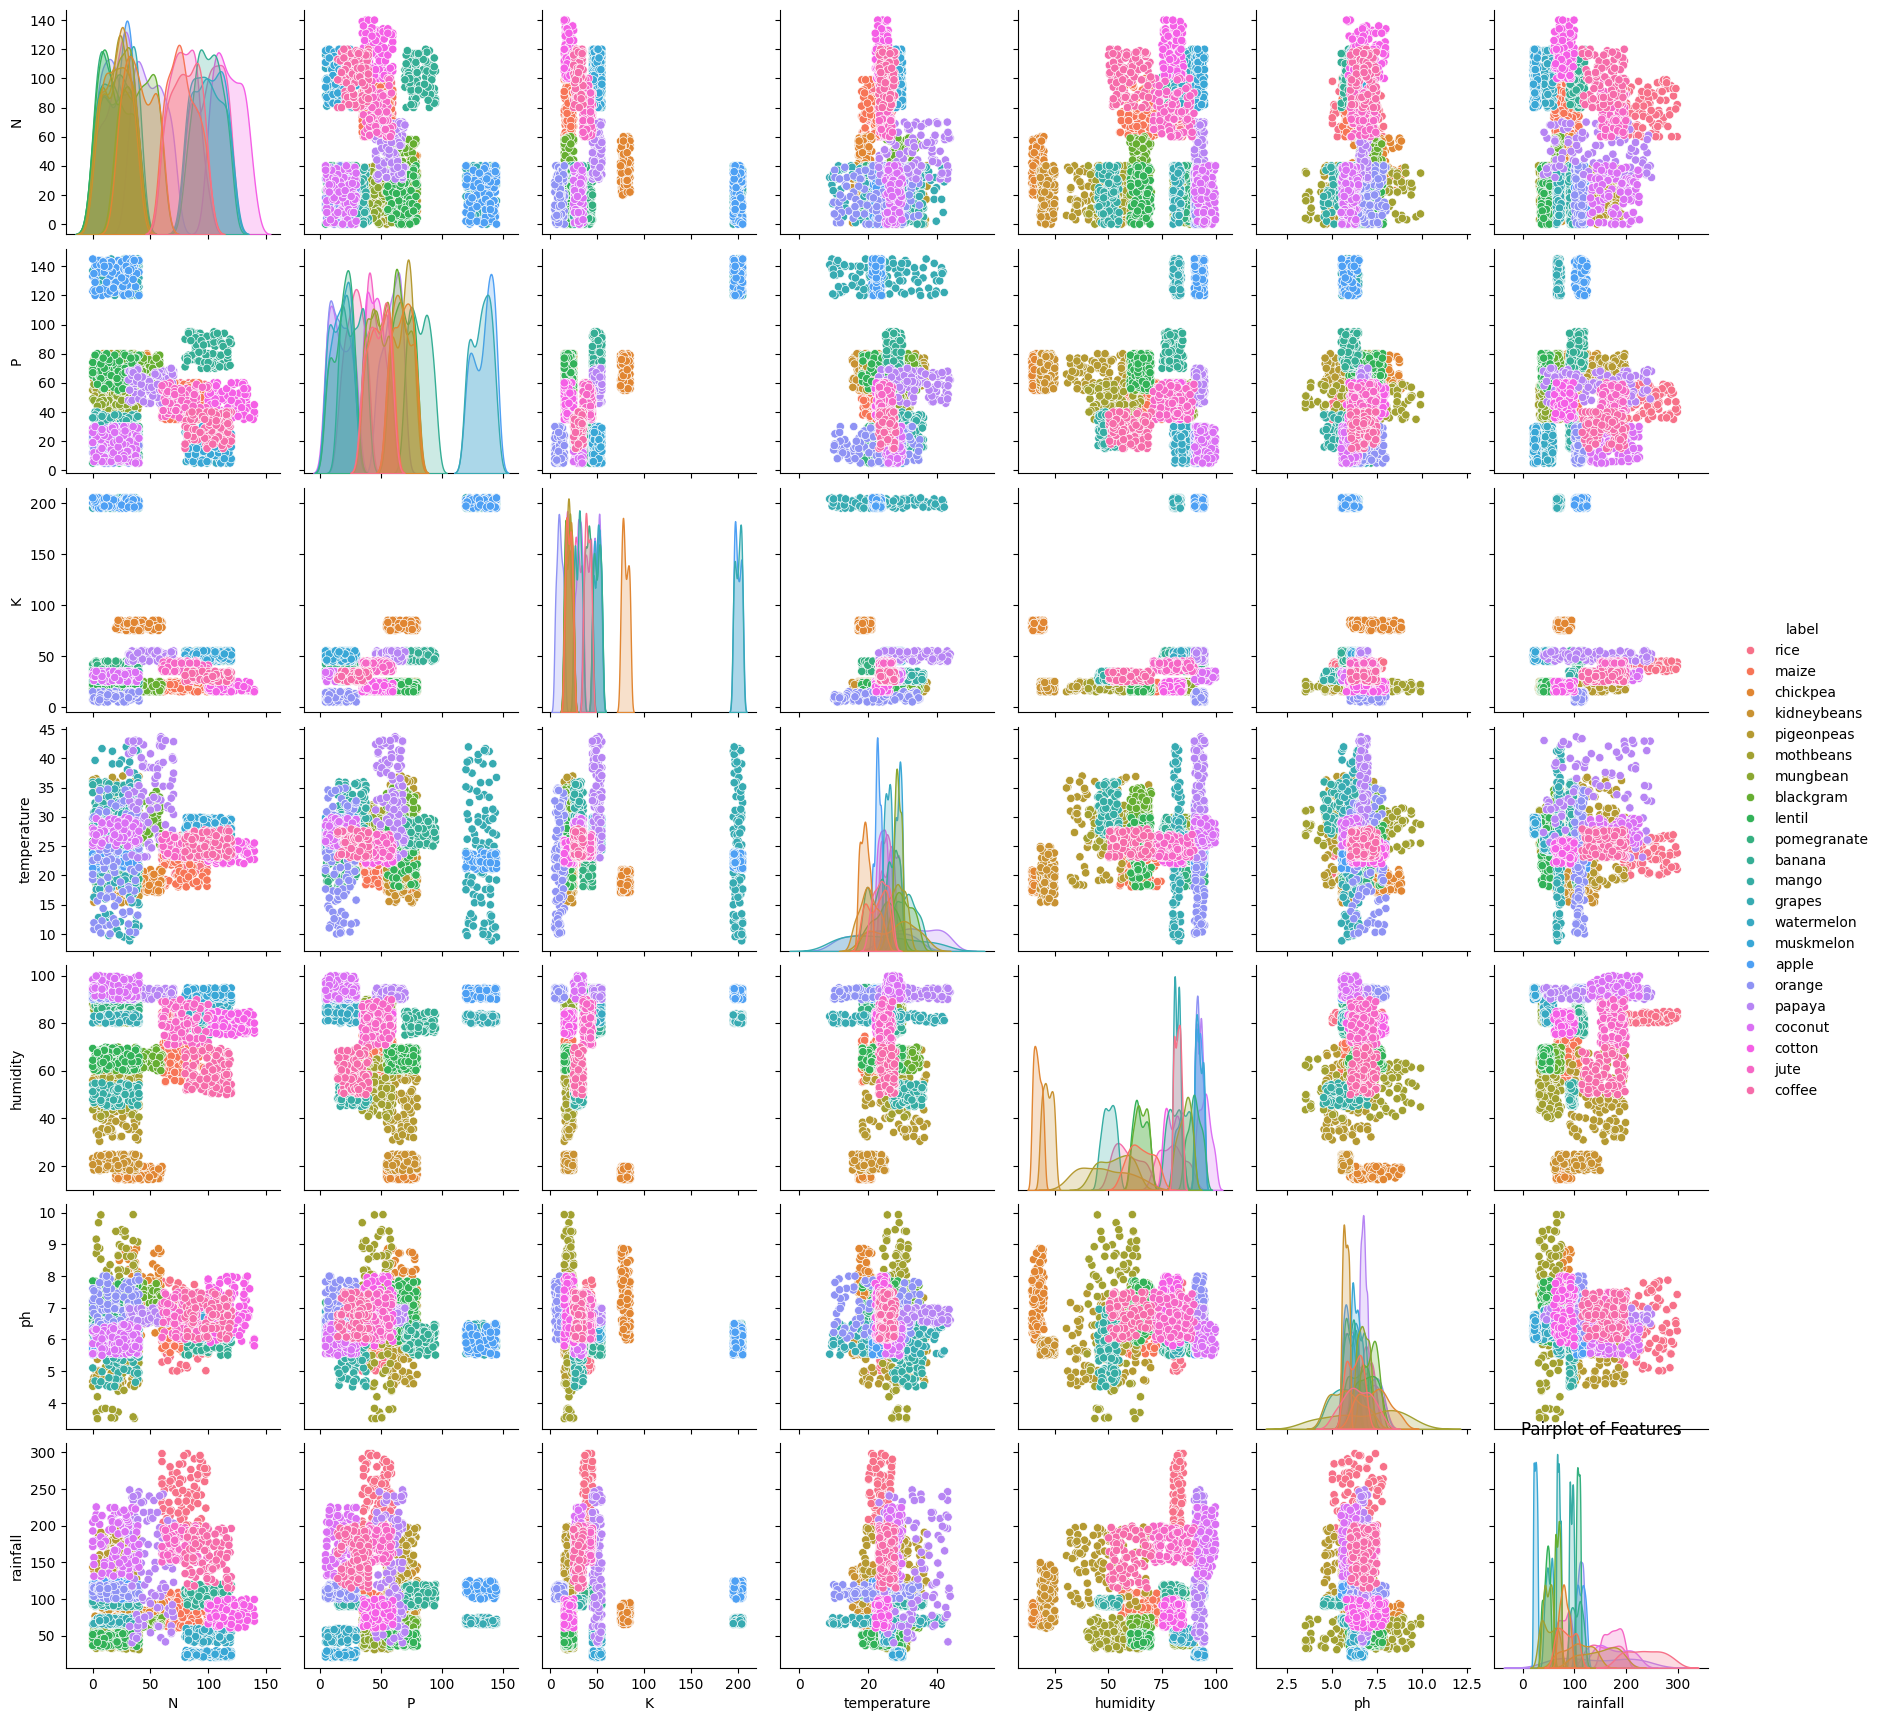

In [21]:
# Pairplot for feature visualization
sns.pairplot(df, hue='label', diag_kind='kde')
plt.title('Pairplot of Features')
plt.show()

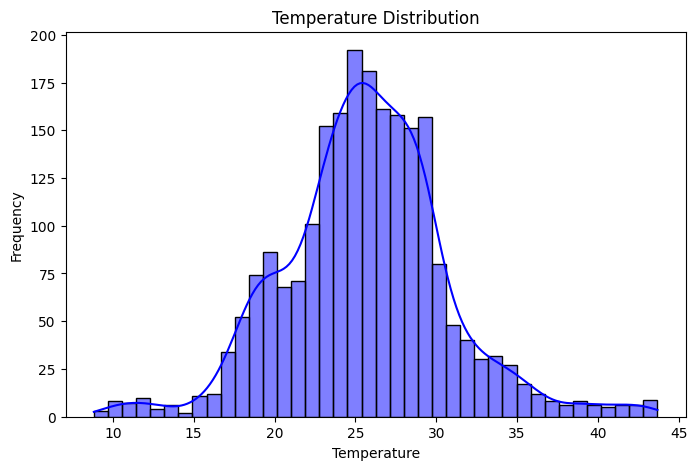

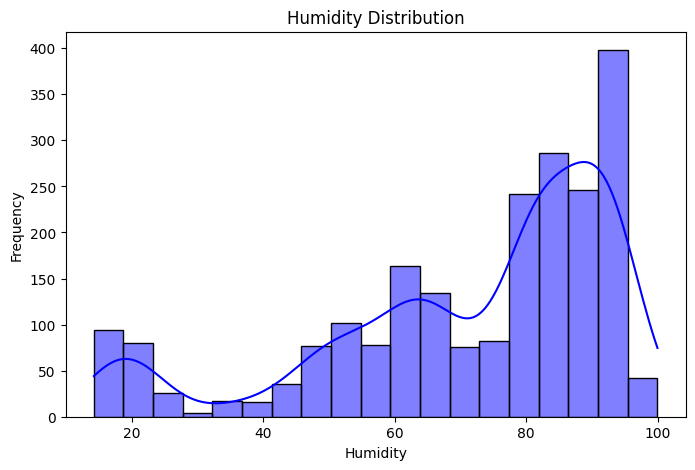

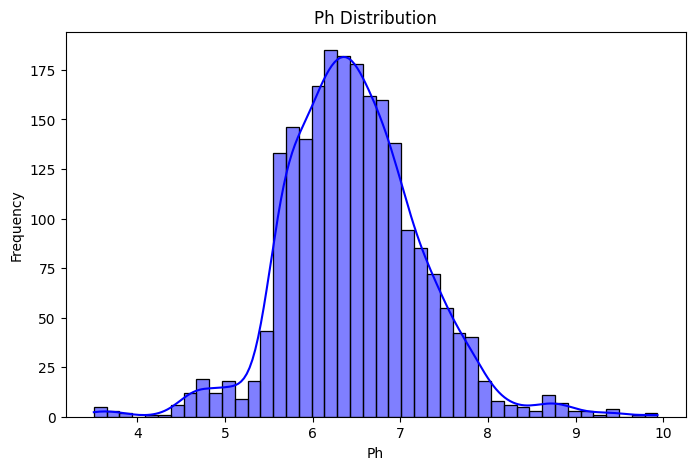

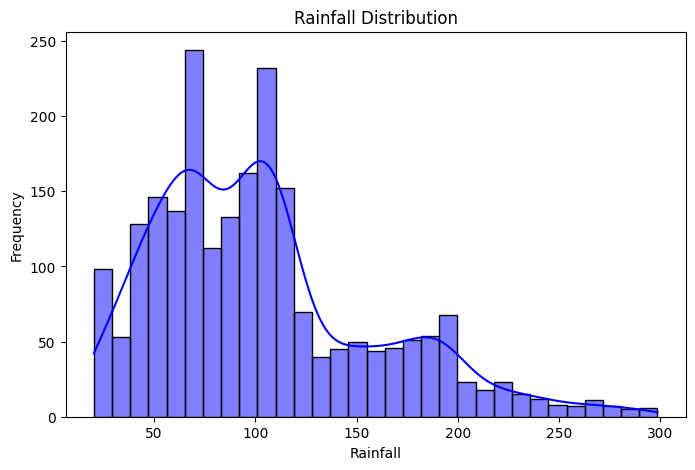

In [23]:
# Feature-wise distribution
features = ['temperature', 'humidity', 'ph', 'rainfall']  # Example feature names
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='temperature', ylabel='Count'>

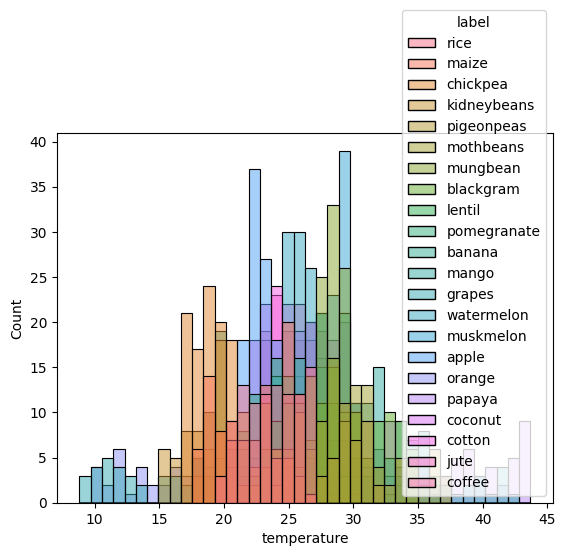

In [14]:
sns.histplot(df , x='temperature',hue='label')

<Axes: xlabel='humidity', ylabel='Count'>

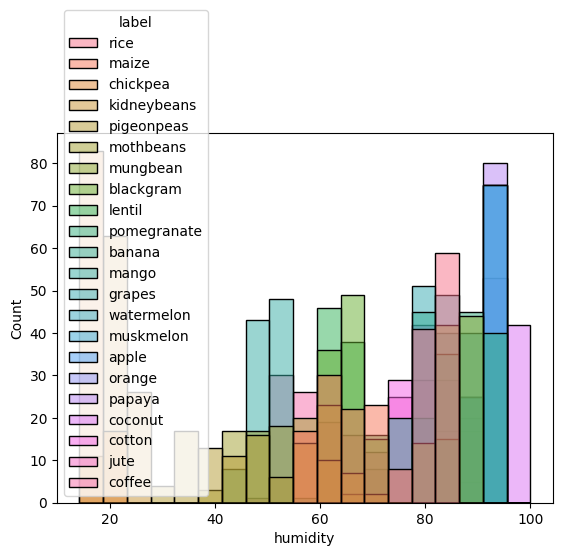

In [15]:
sns.histplot(df , x='humidity',hue='label')

In [11]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [24]:
x = df.drop('label',axis=1)
y = df['label']

In [25]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1656 to 860
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [28]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1760 entries, 1656 to 860
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
1760 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test,y_pred)
print("Logistic regression model accuracy: " + str(lr_accuracy))

Logistic regression model accuracy: 0.9454545454545454


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

In [34]:
dt_acc = accuracy_score(y_test,y_pred2)
rf_acc = accuracy_score(y_test,y_pred3)
print("Decision tree model accuracy: " + str(dt_acc))
print("Random forest model accuracy: " + str(rf_acc))

Decision tree model accuracy: 0.9840909090909091
Random forest model accuracy: 0.9931818181818182


# PREDICTION

In [35]:
import pickle

In [37]:
model_filename = 'crop_recommender.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f'Model saved as {model_filename}')

Model saved as crop_recommender.pkl


In [38]:
#Load the model using pickle
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print('Model loaded successfully!')

Model loaded successfully!


In [42]:
arr = [[74,35,40,26.491096,80.158363,6.980401,242.864034]]
predicted_crop = loaded_model.predict(arr)
print(f'Predicted Crop: {predicted_crop[0]}')

Predicted Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
